## 1) Google play store data analysis :

     In this notebook I will analyze and compare different apps on android google play store 
     I will also make some useful visualizations to make it easy for anyone to see the insights from the data
     
     
     

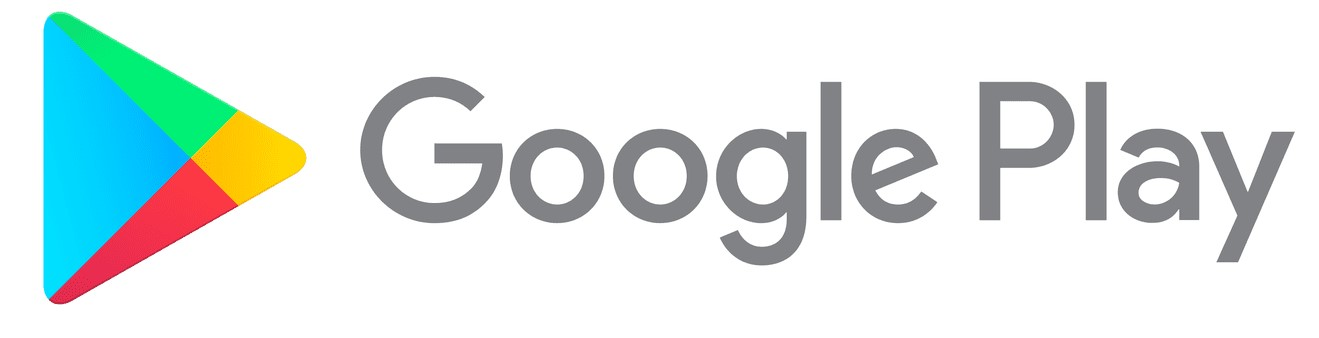

##  2) We have 2 datasets :
  **1. apps.csv** : it contains information about every app like ( catogery , rating , price , etc..)   
  **2. user_reviews.csv** : contains many user reviews and sentiments about each app

## 3) importing libararies and reading the data :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

apps = pd.read_csv("../input/processed-android/apps.csv",index_col = 0)
reviews = pd.read_csv("../input/processed-android/user_reviews.csv",usecols = ['App','Sentiment','Sentiment_Polarity'])

In [ ]:
apps.head()

In [ ]:
apps.shape

In [ ]:
reviews.head()

In [ ]:
reviews.shape

## 4) Data cleaning :

###  &nbsp; &nbsp; 4.1) removing duplicates :

In [ ]:
apps.drop_duplicates(subset = ['App'],inplace = True)
apps.shape

###  &nbsp; &nbsp; 4.2) working with data types:

In [ ]:
apps.dtypes

Installs column and price should be numeric not object data type

In [ ]:
apps['Installs'].value_counts()

In [ ]:
apps['Price'].value_counts()

both columns has non-numeric characters that should be removed 

In [ ]:
not_numeric = ['$',',','+']
def edit_string(s) :
    for c in not_numeric :
        s = s.replace(c,'')
    return s

apps['Installs'] = apps['Installs'].apply(edit_string)
apps['Price'] = apps['Price'].apply(edit_string)


In [ ]:
apps['Installs'] = apps['Installs'].astype(int)
apps['Price'] = apps['Price'].astype(float)
apps.dtypes

In [ ]:
reviews.dtypes

No problem in reviews data types

###  &nbsp; &nbsp; 4.3) checking mixed data types :

In [ ]:
for col in apps.columns.tolist(): 
    weird = (apps[[col]].applymap(type) != apps[[col]].iloc[0].apply(type)).any(axis = 1) 
    if len (apps[weird]) > 0: 
        print (col)

In [ ]:
apps['Current Ver'] = apps['Current Ver'].astype(str)
apps['Android Ver'] = apps['Android Ver'].astype(str)

In [ ]:
for col in reviews.columns.tolist(): 
    weird = (reviews[[col]].applymap(type) != reviews[[col]].iloc[0].apply(type)).any(axis = 1) 
    if len (reviews[weird]) > 0: 
        print (col)

In [ ]:
reviews['Sentiment'] = reviews['Sentiment'].astype(str)

## 5) Distribution of app rating and salas analysis:

###  &nbsp; &nbsp; 5.1) Distribution of rating for apps :

In [ ]:
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.title('Distribution of ratings')
plt.hist(apps['Rating'],bins = np.arange(0,5.2,0.2))
plt.show()

###  &nbsp; &nbsp; 5.2) relation between price and rating :

In [ ]:
edited_apps1 = apps.dropna(subset = ['Rating','Price','Reviews'],how = 'any')
paid_apps1 = edited_apps1.loc[edited_apps1['Type']=='Paid']
x = paid_apps1['Price']
y = paid_apps1['Rating']
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Distribution of ratings')
plt.scatter(x,y,s = 10)
plt.show()

We can see that there is so outliers which has really high price
this can be junk apps let's see the highest prices apps aand filter it

In [ ]:
paid_apps1.sort_values('Price',ascending = False).head(20)

We can see that most of the very expensive apps are junk apps ( it has little reviews and relatively low rating so it maybe just made for joke or on purpose to make rich people buy them , thing like ( I'm rich , I'm extremely rich )
so we can filter out the apps taht are higher than $100 and plot again after filtering

In [ ]:
apps = apps.loc[apps['Price']<=100]
edited_apps1 = apps.dropna(subset = ['Rating','Price','Reviews'],how = 'any')
paid_apps1 = edited_apps1.loc[edited_apps1['Type']=='Paid']
x = paid_apps1['Price']
y = paid_apps1['Rating']
plt.xlabel('Price')
plt.ylabel('Rating')
plt.scatter(x,y,s = 5)
plt.show()

we can see that there is no really high correlation between price and rating , so when the price of the app is high it doesn't always mean it's the best

###  &nbsp; &nbsp; 5.3) best 10 apps by sales :

In [ ]:
apps['Sales'] = apps['Installs'] * apps['Price']
heighst = apps.nlargest(10,'Sales')[['App','Sales']].sort_values('Sales')
plt.barh(heighst['App'],heighst['Sales'])
plt.show()

###  &nbsp; &nbsp; 5.4) does size affect rating,price and number of installs?


In [ ]:
apps.loc[apps['Size']>=80,'Size_cat'] = '1.80MB or higher'
apps.loc[(apps['Size']>=60) & (apps['Size'] <80),'Size_cat'] = '2.between 60 and 80'
apps.loc[(apps['Size']>=40) & (apps['Size'] <60),'Size_cat'] = '3.between 40 and 60'
apps.loc[(apps['Size']>=20) & (apps['Size'] <40),'Size_cat'] = '4.between 20 and 40'
apps.loc[apps['Size']<20,'Size_cat'] = '5.less than 20MB'

edited_apps = apps.dropna(subset = ['Rating','Size','Installs'],how = 'any')
gg = edited_apps.groupby('Size_cat').agg({'Rating':['mean'],'Installs':['sum']})

paid_apps2 = apps.loc[apps['Type']=='Paid']
edited_apps2 = paid_apps2.dropna(subset = ['Size','Price'],how = 'any')
ggg = edited_apps2.groupby('Size_cat')['Price'].mean()

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols = 2)
ax1.scatter(edited_apps['Size'],edited_apps['Rating'],s = 1)
ax1.set_xlabel('Size(MB)')
ax1.set_ylabel('Rating')

ax2.barh(gg.index,gg[('Installs','sum')])
ax2.set_xlabel('installs')

ax3.barh(ggg.index,ggg.values)
ax3.set_xlabel('avg Price')

ax4.barh(gg.index,gg[('Rating','mean')])
ax4.set_xlabel('avg rating')

plt.tight_layout()
plt.show()

from the above visualizations we can conclude that : 
1. there is not really a strong correlation between rating and size which means we can't say that a bigger app size will get higher    rating
2. most of the installs happen for small-sized apps which means users care about the memory
3. the price doesn't really depend on the app size (it varies)
4. the rating also doesn't depend on the size ( we can see that the avg rating are almost the same for all size categories)

## 6) what app categories has the highest rating, number of installs and sales?

In [ ]:
edited_apps = apps.dropna(subset = ['Rating','Installs'],how = 'any')
g = edited_apps.groupby('Category').agg({'Rating':['mean','min','max'],'Installs':['sum'],'Sales':['sum']})
g['Rating']['mean'].nlargest(5)

In [ ]:
g['Rating']['mean'].std()

Here we can see the 5 categories which has the highest rating
although from the standard deviation we can see that there is no big difference in the apps rating

In [ ]:
g.sort_values(by = ('Installs','sum'),inplace = True)
plt.style.use('default')
plt.figure(figsize = (10,10))
plt.title('Comparing number of installs for different categories')
plt.xscale('log')
plt.barh(g.index,g['Installs']['sum'])
plt.show()

In [ ]:
g.sort_values(by = ('Sales','sum'),inplace = True)
plt.style.use('default')
plt.figure(figsize = (10,10))
plt.title('Comparing Sales for different categories')
plt.xscale('log')
plt.barh(g.index,g['Sales']['sum'])
plt.show()

## 7) Comparison between free apps and paid apps in terms of (rating,installs,sentiment)

###  &nbsp; &nbsp; 7.1) Rating and Number of installs :


In [ ]:
free_apps = apps.loc[apps['Type']=='Free']
free_apps = free_apps.dropna(subset = ['Rating'])

paid_apps = apps.loc[apps['Type']=='Paid']
paid_apps = paid_apps.dropna(subset = ['Rating'])


plt.boxplot([free_apps['Rating'],paid_apps['Rating']],labels = ['free apps','paid apps'],showfliers=False,medianprops = {'color':'blue'},widths = [0.8,0.8])
plt.title('Rating comparison')


plt.show()

In [ ]:
[free_apps['Installs'].sum(),paid_apps['Installs'].sum()]

###  &nbsp; &nbsp; 7.2) Comparison of sentiment :


In [ ]:
reviews.dropna(how = 'any',inplace = True)
apps_merged = apps.merge(reviews,on = 'App')
apps_merged.head()

In [ ]:
free_apps = apps_merged.loc[apps_merged['Type']=='Free']
paid_apps = apps_merged.loc[apps_merged['Type']=='Paid']

plt.boxplot([free_apps['Sentiment_Polarity'],paid_apps['Sentiment_Polarity']],labels = ['free apps','paid apps'],showfliers=False,medianprops = {'color':'blue'},widths = [0.8,0.8])
plt.show()

So we can see that in terms of both rating and sentiment paid apps is better than free apps
and free apps is more frequently installed that paid apps